# BANKING DATA ANALYSIS 

# Project Description
In the ever-evolving world of banking and finance, understanding customer behavior and the regional impact of transactions plays a crucial role in decision-making and strategic planning. This project, titled "Analyzing Banking Trends: Customer Transactions and Regional Impact," aims to explore and analyze the vast troves of transaction data to gain valuable insights into customer behavior patterns and their implications on different world regions.

Objective: The primary objective of this project is to delve into customer transactions and identify trends that may impact regional economies and financial systems. By combining data cleaning techniques in Python and utilizing SQL queries on a set of interconnected tables, we aim to gain a comprehensive understanding of how customer transactions vary across different regions and the possible implications on the banking sector.

Data Sources: The project leverages three key tables that provide valuable information for analysis:

1. world_regions table: This table contains data on various world regions and their corresponding codes and names. It serves as a reference to categorize customers based on their regional affiliation.

2. user_nodes table: The user_nodes table holds crucial details about consumers' banking nodes, including their unique consumer IDs, associated region IDs, node IDs, start dates, and end dates. This data enables us to identify the specific banking nodes to which customers are connected and their duration of association.

3. user_transaction table: This table is a comprehensive repository of customer transactions, containing data such as consumer IDs, transaction dates, types of transactions, and transaction amounts. Analyzing this data allows us to uncover patterns in customer spending and financial behaviors
 
All of this dataset was sourced by hicounselor(https://hicounselor.com/projects/analyzing-banking-trends-customer-transactions-and-regional-impact) as part of their materials for individuals to learn and build their portfolio

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "banking_data",
    "user": "postgres",
    "password": "dibie04062000"
}


In [3]:
conn = psycopg2.connect(**db_params)


In [4]:
query = "SELECT * FROM user_nodes_cleaned;"  # Replace "your_table" with the actual table name
user_nodes = pd.read_sql_query(query, conn)


In [5]:
user_nodes

,consumer_id,region_id,node_id,start_date,end_date
0,1,3,4,2020-01-02,2020-01-03
1,2,3,5,2020-01-03,2020-01-17
2,3,5,4,2020-01-27,2020-02-18
3,4,5,4,2020-01-07,2020-01-19
4,5,3,3,2020-01-15,2020-01-23
...,...,...,...,...,...
3495,496,3,4,2020-02-25,2021-12-31
3496,497,5,4,2020-05-27,2021-12-31
3497,498,1,2,2020-04-05,2021-12-31
3498,499,5,1,2020-02-03,2021-12-31


In [6]:
user_nodes.isnull().sum()

consumer_id    0
region_id      0
node_id        0
start_date     0
end_date       0
dtype: int64

In [7]:
query = "SELECT * FROM user_transaction_cleaned;"  # Replace "your_table" with the actual table name
user_transaction = pd.read_sql_query(query, conn)


In [8]:
user_transaction

,consumer_id,transaction_date,transaction_type,transaction_amount
0,312,2020-01-20,deposit,485.0
1,376,2020-01-03,deposit,706.0
2,188,2020-01-13,deposit,601.0
3,138,2020-01-11,deposit,520.0
4,373,2020-01-18,deposit,596.0
...,...,...,...,...
5863,155,2020-01-10,deposit,712.0
5864,398,2020-01-01,deposit,196.0
5865,255,2020-01-14,deposit,563.0
5866,185,2020-01-29,deposit,626.0


In [9]:
user_transaction.isnull().sum()

consumer_id           0
transaction_date      0
transaction_type      0
transaction_amount    0
dtype: int64

In [10]:
query = "SELECT * FROM world_regions;"  # Replace "your_table" with the actual table name
world_regions = pd.read_sql_query(query, conn)

In [11]:
world_regions

,region_code,region_name
0,1,United States
1,2,Europe
2,3,Australia
3,4,Asia
4,5,Africa
5,6,Russia
6,7,China


In [12]:
world_regions.isnull().sum()

region_code    0
region_name    0
dtype: int64

# Exploratory Analysis

Task 1:List all regions along with the number of users assigned to each region.


In [13]:
query ="""SELECT
    wr.region_name AS Region,
    COUNT(DISTINCT un.consumer_id) AS NumberOfUsers
FROM
    world_regions wr
LEFT JOIN
    user_nodes_cleaned un
ON
    wr.region_code = un.region_id
GROUP BY
    wr.region_name
ORDER BY
    NumberOfUsers DESC;

"""

In [14]:
regions=  pd.read_sql_query(query, conn)

In [15]:
regions 

,region,numberofusers
0,United States,110
1,Europe,105
2,Australia,102
3,Asia,95
4,Africa,88
5,China,0
6,Russia,0


In [16]:
#conn.close()

Text(0.5, 1.0, 'Number of Users by Region')

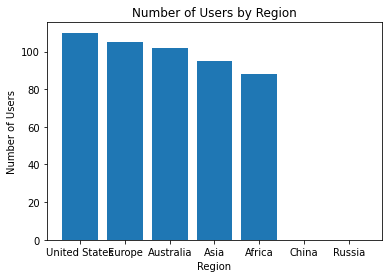

In [17]:
plt.bar(x=regions['region'], height=regions['numberofusers'])
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.title('Number of Users by Region')


In [18]:
region_name = regions['region']

In [19]:
num_users = regions['numberofusers']

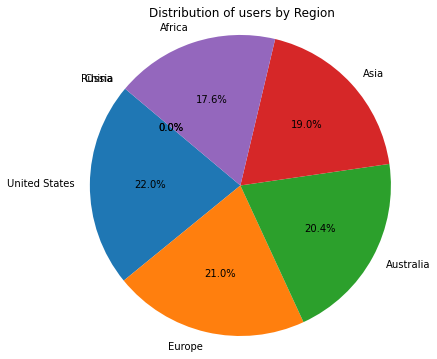

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(num_users, labels=region_name, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of users by Region')
plt.axis('equal')  
plt.show()

Task 2:
Find the user who made the largest deposit amount and the transaction type for that deposit.

In [21]:
query = """SELECT consumer_id,transaction_type,transaction_amount FROM user_transaction_cleaned WHERE transaction_amount = (select MAX(transaction_amount) from user_transaction_cleaned);
"""

In [22]:
largest_amount= pd.read_sql_query(query, conn)

In [23]:
largest_amount

,consumer_id,transaction_type,transaction_amount
0,218,deposit,1000.0
1,219,deposit,1000.0


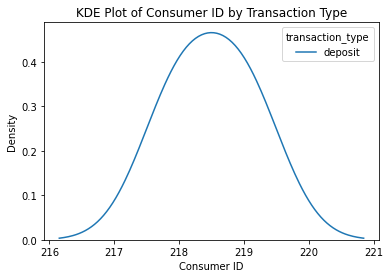

In [24]:
sns.kdeplot(data=largest_amount, x='consumer_id', hue='transaction_type', common_norm=False)
plt.title("KDE Plot of Consumer ID by Transaction Type")
plt.xlabel("Consumer ID")
plt.ylabel("Density")
plt.show()


Task 3: 
Calculate the total amount deposited for each user in the "Europe" region.

In [25]:
query ="""SELECT ut.consumer_id AS user, SUM(ut.transaction_amount) AS total_amount_deposited
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'Europe'
GROUP BY ut.consumer_id
ORDER BY total_amount_deposited desc;
"""

In [26]:
europe_deposit= pd.read_sql_query(query, conn)

In [27]:
europe_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0
...,...,...
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0


In [28]:
# plt.bar(europe_deposit['user'], europe_deposit['total_amount_deposited'])
# plt.xlabel('User')
# plt.ylabel('Total Amount Deposited')
# plt.title('Total Amount Deposited by User')
# plt.show()

In [29]:
highset_deposit = europe_deposit.head(5)

In [30]:
highset_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0


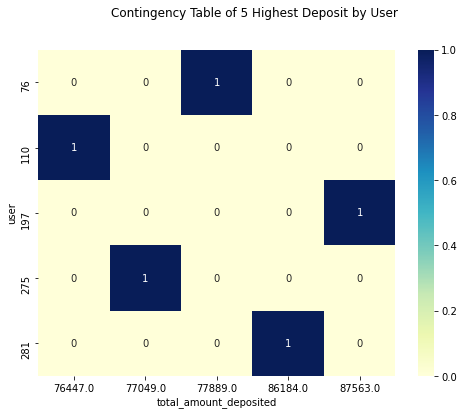

In [31]:
contingency_table = pd.crosstab(highset_deposit["user"], highset_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 5 Highest Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

In [32]:
lowest_deposit = europe_deposit.tail(5)

In [33]:
lowest_deposit

,user,total_amount_deposited
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0
104,133,6482.0


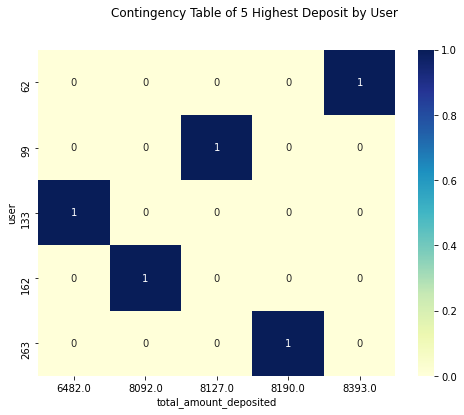

In [34]:
contingency_table = pd.crosstab(lowest_deposit["user"], lowest_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 5 Highest Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

TASK 4:
Calculate the total number of transactions made by each user in the "United States" region.

In [35]:
query = """SELECT ut.consumer_id AS user, COUNT(ut.consumer_id) AS total_transactions
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'United States'
GROUP BY ut.consumer_id
ORDER BY total_transactions DESC;
"""

In [36]:
usa_transaction = pd.read_sql_query(query,conn)

In [37]:
usa_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
...,...,...
105,114,21
106,79,21
107,84,14
108,15,14


In [38]:
highset_transaction = usa_transaction.head(10)

In [39]:
highset_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
5,422,147
6,102,147
7,344,147
8,442,147
9,283,140


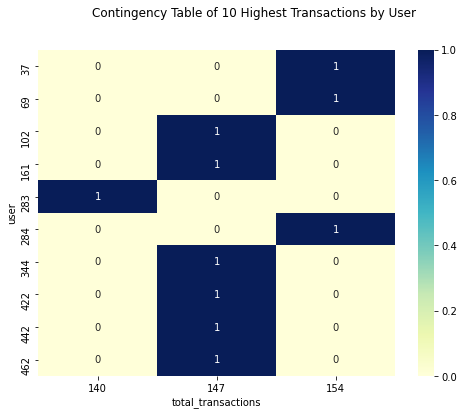

In [40]:
contingency_table = pd.crosstab(highset_transaction["user"], highset_transaction["total_transactions"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 10 Highest Transactions by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()


In [41]:
lowest_transaction = usa_transaction.tail(10)

In [42]:
lowest_transaction 

,user,total_transactions
100,204,28
101,12,28
102,137,28
103,71,28
104,455,21
105,114,21
106,79,21
107,84,14
108,15,14
109,73,14


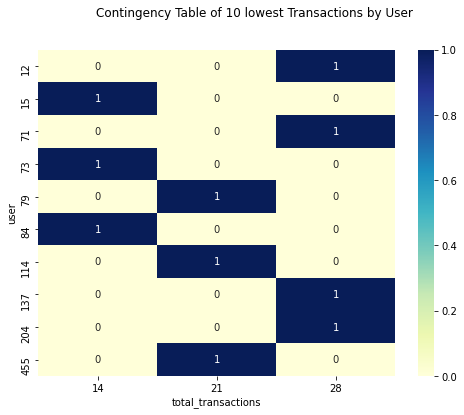

In [43]:
contingency_table = pd.crosstab(lowest_transaction["user"], lowest_transaction["total_transactions"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 10 lowest Transactions by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()


Task 5: 
Calculate the total number of users who made more than 5 transactions.

In [44]:
query ="""SELECT consumer_id, COUNT(consumer_id) AS num_transactions
FROM user_transaction_cleaned
GROUP BY consumer_id
HAVING COUNT(consumer_id) > 5
ORDER BY num_transactions DESC;

"""

In [45]:
transactions_greaterthan5= pd.read_sql_query(query, conn)

In [46]:
transactions_greaterthan5

,consumer_id,num_transactions
0,301,22
1,226,22
2,281,22
3,467,22
4,37,22
...,...,...
410,34,6
411,57,6
412,199,6
413,225,6


Task 6:
Find the regions with the highest number of nodes assigned to them.


In [47]:
query = """SELECT wr.region_name, COUNT(un.node_id) AS num_nodes
FROM user_nodes_cleaned un
JOIN world_regions wr ON wr.region_code = un.region_id
GROUP BY wr.region_name
ORDER BY num_nodes DESC;

"""

In [48]:
region_with_highest_nodes = pd.read_sql_query(query,conn)

In [49]:
region_with_highest_nodes

,region_name,num_nodes
0,United States,770
1,Europe,735
2,Australia,714
3,Asia,665
4,Africa,616


In [50]:
region_names = region_with_highest_nodes['region_name']
num_nodes = region_with_highest_nodes['num_nodes']

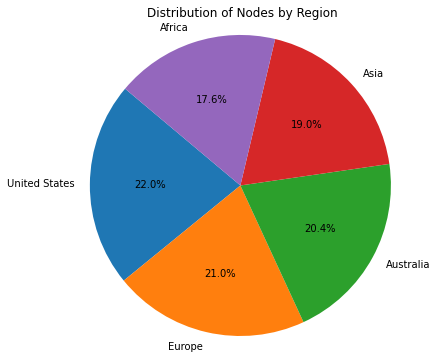

In [51]:
plt.figure(figsize=(6, 6))
plt.pie(num_nodes, labels=region_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nodes by Region')
plt.axis('equal')  
plt.show()

Task 7: 
Find the user who made the largest deposit amount in the "Australia" region.

In [52]:
query = """SELECT ut.consumer_id, ut.transaction_amount as largest_deposit
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
WHERE ut.transaction_type = 'deposit' AND wr.region_name = 'Australia'
ORDER BY ut.transaction_amount DESC
LIMIT 1;
"""

In [53]:
australia_deposit = pd.read_sql_query(query,conn)

In [54]:
australia_deposit

,consumer_id,largest_deposit
0,285,998.0


Task 8: Calculate the total amount deposited by each user in each region.

In [55]:
query = """SELECT ut.consumer_id, SUM(ut.transaction_amount) as total_deposit, wr.region_name
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
WHERE ut.transaction_type = 'deposit'
GROUP BY ut.consumer_id, wr.region_name
ORDER BY wr.region_name DESC;"""


In [56]:
deposit_per_region = pd.read_sql_query(query,conn)

In [57]:
deposit_per_region

,consumer_id,total_deposit,region_name
0,6,33054.0,United States
1,8,14763.0,United States
2,12,8008.0,United States
3,14,11039.0,United States
4,15,7714.0,United States
...,...,...,...
495,490,5026.0,Africa
496,494,12131.0,Africa
497,495,12698.0,Africa
498,497,20804.0,Africa


Task 9: Retrieve the total number of transactions for each region.

In [58]:
query = """SELECT COUNT(ut.consumer_id) as num_transactions, wr.region_name
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
GROUP BY wr.region_name;
"""

In [59]:
transactions_per_region = pd.read_sql_query(query,conn)

In [60]:
transactions_per_region

,num_transactions,region_name
0,9107,United States
1,8414,Australia
2,6797,Africa
3,7952,Asia
4,8806,Europe


Text(0.5, 1.0, 'Number of transaction by Region')

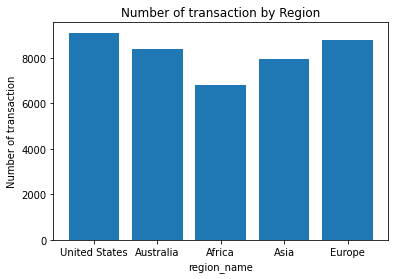

In [61]:
plt.bar(x=transactions_per_region['region_name'], height=transactions_per_region['num_transactions'])
plt.xlabel('region_name')
plt.ylabel('Number of transaction')
plt.title('Number of transaction by Region')


Task 10: How many consumers are allocated to each region?










In [62]:
query = """SELECT wr.region_name, wr.region_code, COUNT(DISTINCT un.consumer_id)
FROM user_nodes_cleaned as un
LEFT JOIN world_regions as wr ON un.region_id = wr.region_code
GROUP BY wr.region_name, wr.region_code;

"""

In [63]:
consumers_per_region = pd.read_sql(query,conn)

In [64]:
consumers_per_region

,region_name,region_code,count
0,Africa,5,88
1,Asia,4,95
2,Australia,3,102
3,Europe,2,105
4,United States,1,110


In [65]:
region_names = consumers_per_region['region_name']
region_codes = consumers_per_region['region_code']
count = consumers_per_region['count']

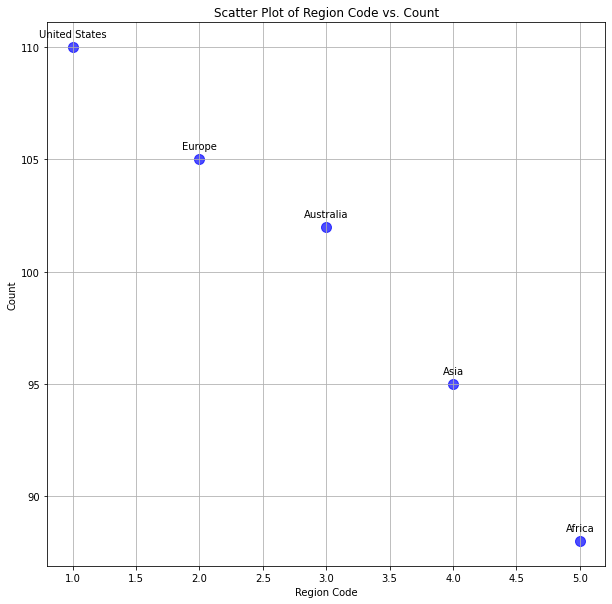

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(region_codes, count, c='blue', marker='o', s=100, alpha=0.7)
plt.title('Scatter Plot of Region Code vs. Count')
plt.xlabel('Region Code')
plt.ylabel('Count')
for i in range(len(region_names)):
    plt.annotate(region_names[i], (region_codes[i], count[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True)
plt.show()

Task 11: What is the unique count and total amount for each transaction type?

In [67]:
query = """SELECT COUNT(DISTINCT consumer_id), SUM(transaction_amount), transaction_type
FROM user_transaction_cleaned
GROUP BY transaction_type
ORDER BY SUM(transaction_amount);
"""

In [68]:
amount_per_transactiontype = pd.read_sql_query(query,conn)

In [69]:
amount_per_transactiontype

,count,sum,transaction_type
0,439,793003.0,withdrawal
1,448,806537.0,purchase
2,500,1359168.0,deposit


In [70]:
sum_amount = amount_per_transactiontype['sum']
transaction_type = amount_per_transactiontype['transaction_type']
count =amount_per_transactiontype['count']

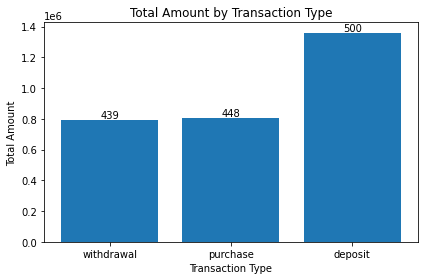

In [71]:
plt.bar(transaction_type, sum_amount)
for i, v in enumerate(count):
    plt.text(i, sum_amount[i], str(v), ha='center', va='bottom')
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.title("Total Amount by Transaction Type")
plt.tight_layout()
plt.show()

Task 12: What are the average deposit counts and amounts for each transaction type ('deposit') across all customers, grouped by transaction type?




In [72]:
query ="""
WITH DepositSummary AS (
    SELECT
        transaction_type,
        consumer_id,
        COUNT(transaction_type) AS TotalDepositCounts,
        SUM(transaction_amount) AS TotalDepositAmount
    FROM user_transaction_cleaned
    WHERE transaction_type = 'deposit'
    GROUP BY transaction_type, consumer_id
)

SELECT
    transaction_type,
    ROUND(AVG(TotalDepositCounts), 0) AS AvgDepositCounts,
    ROUND(AVG(TotalDepositAmount), 0) AS AvgDepositAmount
FROM DepositSummary
GROUP BY transaction_type;
"""

In [73]:
deposit_summary = pd.read_sql_query(query,conn)

In [74]:
deposit_summary

,transaction_type,avgdepositcounts,avgdepositamount
0,deposit,5.0,2718.0


# MACHINE LEARNING

My machine learning model aims to predict customer churn in this banking dataset. my definition of customer Customer churn refers to customers who have not made any transactions as of the last 6 months 0f 2021  and are labelled as "churned." The model aims to answer the question of which customers are likely to churn based on various features such as transaction history, region, and other relevant information. The bank can proactively retain those customers by identifying potential churners in advance.

In [75]:
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [76]:
query = """SELECT un.*, ut.*, wr.*
FROM user_nodes_cleaned un
LEFT JOIN user_transaction_cleaned ut ON un.consumer_id = ut.consumer_id
LEFT JOIN world_regions wr ON un.region_id = wr.region_code;

"""

In [77]:
data = pd.read_sql_query(query,conn)

In [78]:
data

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name
0,312,5,2,2020-04-24,2021-12-31,312,2020-01-20,deposit,485.0,5,Africa
1,312,5,4,2020-04-01,2020-04-23,312,2020-01-20,deposit,485.0,5,Africa
2,312,5,3,2020-03-16,2020-03-31,312,2020-01-20,deposit,485.0,5,Africa
3,312,5,4,2020-02-21,2020-03-15,312,2020-01-20,deposit,485.0,5,Africa
4,312,5,5,2020-02-09,2020-02-20,312,2020-01-20,deposit,485.0,5,Africa
...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-01-13,deposit,995.0,5,Africa
41072,309,5,4,2020-02-28,2020-03-02,309,2020-01-13,deposit,995.0,5,Africa
41073,309,5,1,2020-02-27,2020-02-27,309,2020-01-13,deposit,995.0,5,Africa
41074,309,5,1,2020-02-07,2020-02-26,309,2020-01-13,deposit,995.0,5,Africa


In [79]:
data['end_date'] = pd.to_datetime(data['end_date'])
data['start_date'] = pd.to_datetime(data['start_date'])


In [80]:
end_date = datetime(2021, 6, 30)  # Adjust as needed based on your data
start_date = datetime(2020, 1, 1)  # Adjust as needed based on your data

In [81]:
def label_churn(row):
    if pd.isnull(row['end_date']):
        return 'churned'  # No end date, consider churned
    if row['end_date'] <= end_date:
        return 'active'  # Last transaction date is within the dataset period
    return 'churned'  # Customer is churned based on the dataset period

In [82]:
data['churn'] = data.apply(label_churn, axis=1)



In [83]:
data

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name,churn
0,312,5,2,2020-04-24,2021-12-31,312,2020-01-20,deposit,485.0,5,Africa,churned
1,312,5,4,2020-04-01,2020-04-23,312,2020-01-20,deposit,485.0,5,Africa,active
2,312,5,3,2020-03-16,2020-03-31,312,2020-01-20,deposit,485.0,5,Africa,active
3,312,5,4,2020-02-21,2020-03-15,312,2020-01-20,deposit,485.0,5,Africa,active
4,312,5,5,2020-02-09,2020-02-20,312,2020-01-20,deposit,485.0,5,Africa,active
...,...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-01-13,deposit,995.0,5,Africa,active
41072,309,5,4,2020-02-28,2020-03-02,309,2020-01-13,deposit,995.0,5,Africa,active
41073,309,5,1,2020-02-27,2020-02-27,309,2020-01-13,deposit,995.0,5,Africa,active
41074,309,5,1,2020-02-07,2020-02-26,309,2020-01-13,deposit,995.0,5,Africa,active


In [84]:
data['churn'].value_counts()

active     35212
churned     5864
Name: churn, dtype: int64

In [85]:
# # Import necessary libraries
# import pandas as pd
# from datetime import datetime, timedelta
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Load data from your three tables (you should adapt this part according to your data source)
# user_nodes_data = pd.read_csv('user_nodes.csv')
# user_transaction_data = pd.read_csv('user_transaction.csv')
# world_regions_data = pd.read_csv('world_regions.csv')

# # Define churn based on a time-based threshold (e.g., 3 months of inactivity)
# end_date = datetime.strptime('3/1/20', '%d/%m/%y')
# cutoff_date = end_date - timedelta(days=90)

# # Merge data from user_nodes and user_transaction based on common columns
# merged_data = user_nodes_data.merge(user_transaction_data, on='consumer_id', how='left')

# # Create a target variable for churn based on the time threshold
# merged_data['churn'] = (merged_data['transaction_date'] < cutoff_date).astype(int)

# # Feature engineering: You can add more features based on your data

# # Split data into training and testing sets
# X = merged_data.drop(columns=['churn'])
# y = merged_data['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train a predictive model (e.g., Random Forest)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Print evaluation metrics
# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
